# Glassdoor Web Scraper Data Analysis

#### Steps:
* Load data set
* Find which skills are requested most frequently
* Separate skills by technical vs. non-technical and plot  
* Clean salary data / convert to useable data type/format
* Plot salary data and stratify by estimate type (glassdoor vs employer estimate)

#### Import packages 

In [179]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

Load in dataset from the Glassdoor web scraping tool 

In [180]:
df = pd.read_csv("C:/Users/micha/Desktop/Python Projects/glassdoor.csv", index_col=False)
df = df.drop('Unnamed: 0', axis = 1) # remove Unnamed column that appears from saving as .csv file 

Filter out senior positions since I am mostly concerned with junior positions

In [181]:
df1 = df[-df['Job Title'].str.contains('senior|sr.|sr ')]

I printed out the desired qualifications for each job using the code below to get an idea of the skills that are requested. 

In [182]:
# NOTE TO NOT EXECUTE THIS CELL 

# for i in range(len(df1)): 
#     print(list(df1['Qualifications'])[i])
#     print('=================\n' * 3)
#     print('\n\n\n\n\n')

Initialize a python dictionary to store the counts of each major skill found in job descriptions 

In [183]:
## TO DO - SEPARATE INTO TECHNICAL SKILLS AND SOFT SKILLS    
skills = {'sql':0, 'python':0, ' r ':0, ' r,':0, 'visualiz':0, 'communicate':0, 'javascript':0, 'programming':0,  'data management':0, 'collaborat':0,
         'relational':0, 'reports':0, 'reporting':0,  'quality check':0, 'detail':0, 'details':0, 'confidential':0, 'sas':0, 'gis':0, 'excel':0, 'tableau':0,
         'powerbi':0, 'power bi':0, 'visio ':0, 'jira':0, 'problem-solving':0, 'problem solving':0, 'manipulat':0, 'gathering':0, 'toad':0, 'knime':0, 
         'crystal':0, 'customer service':0, 'annotation':0, 'wrangl':0, 'metric':0, 'aws':0, 'imperfect':0, 'modeling':0, 
         'large-scale':0, 'big data':0, 'large data':0, 'organizational skills':0, 'organized':0}

Iterate through each skill and job description to count how many times each skill is listed in the job's desiried qualifications

In [184]:
df1['Qualifications'].str.lower()
for skill in skills.keys():
    for qs in df1['Qualifications']:
        if skill in qs:
            skills[skill] += 1

Some of the same skills are written slightly differently (eg. 'power bi' and 'powerbi'). To correct for this, add counts of each way a skill is written to get a total for that skill. 

In [185]:
# Alternatively, could possibly loop through and do this by seeing which are close enough to each other 
skills['reports'] += skills['reporting']
del skills['reporting']
skills['power bi'] += skills['powerbi']
del skills['powerbi']
skills['large data'] += skills['big data'] + skills['large-scale']
del skills['big data']
del skills['large-scale']
skills['organizational skills'] += skills['organized']
del skills['organized']
skills['detail'] -= skills['details'] # removes instances of 'job details', 'see more details', etc. 
del skills['details']
skills['problem solving'] += skills['problem-solving']
del skills['problem-solving']

Rename some of the skill keys such that they are more clear for plotting

In [186]:
skills['detail oriented'] = skills.pop('detail')
skills['writing reports'] = skills.pop('reports')
skills['data visualization'] = skills.pop('visualiz')
skills['collaborate'] = skills.pop('collaborat')


Sort the skills dictionary such that the most frequently requested skills appear at the beginning

In [277]:
skillsSorted = {key: val for key, val in sorted(skills.items(), key = lambda x: x[1], reverse = True)}

In [276]:
list(skillsSorted.items())[:15] # print out most commonly requested skills 

[('writing reports', 77),
 ('excel', 72),
 ('sql', 68),
 ('data visualization', 40),
 ('collaborate', 36),
 ('communicate', 34),
 ('tableau', 30),
 ('problem solving', 30),
 ('detail oriented', 30),
 ('python', 29),
 ('power bi', 26),
 ('aws', 24),
 ('large data', 22),
 ('data management', 21),
 ('modeling', 21)]

In [188]:
# Highest frequency skills >60 are report writing, excel, SQL
# >=30 are visualization, collaboration, communication, statistics, problem solving, tableau, attn to detail
# >=20 are python, power bi, AWS, large data sets, modeling, data management

Conclusion:
The highest frequency skills (mentioned in >60 job descriptions) are report writing, excel, SQL
Medium frequency skills (>=30) are visualization, collaboration, communication, statistics, problem solving, tableau, attention to detail
Lower frequency skills (>=20) are python, power bi, AWS, large data sets, modeling, data management

Create a pie chart showing the most commonly desired skills 

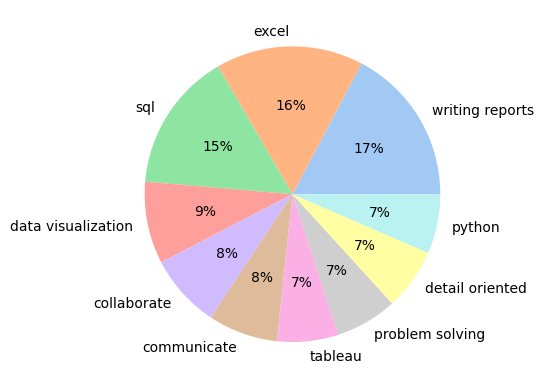

In [270]:
plt.pie(
    list(skillsSorted.values())[:10], 
    labels = list(skillsSorted.keys())[:10], 
    colors = sns.color_palette('pastel'), 
    autopct = '%.0f%%'
    )
plt.show()

Separate the skills into technical and non-technical skills

In [190]:
import copy

skillsTechnical = copy.deepcopy(skillsSorted)
listNonTechnicalSkills = ['communicate', 'collaborate', 'detail oriented', 'problem solving', 'writing reports']
skillsNonTechnical = {}

for nonTechSkill in listNonTechnicalSkills:
    skillsNonTechnical[nonTechSkill]= skillsTechnical.pop(nonTechSkill)


Plot technical skills

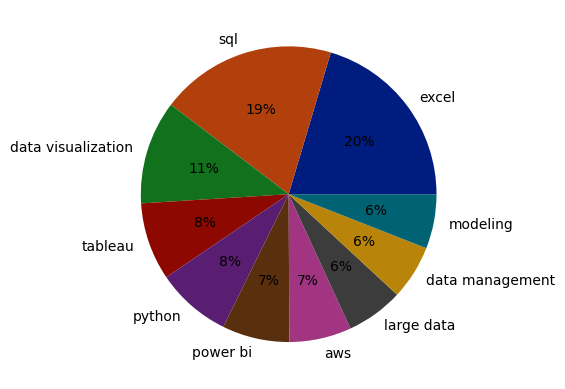

In [263]:

plt.pie(
    list(skillsTechnical.values())[:10], 
    labels = list(skillsTechnical.keys())[:10], 
    colors = sns.set_palette("dark"), 
    autopct = '%.0f%%'
    )
plt.show()

Plot non-technical skills

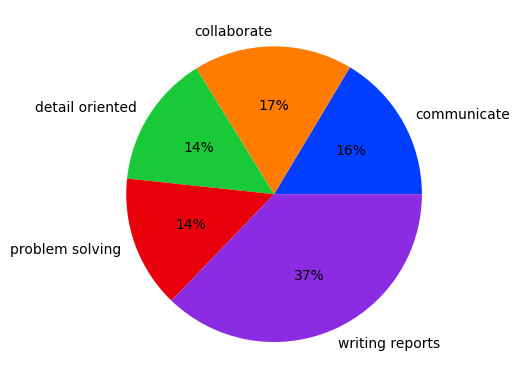

In [264]:
plt.pie(
    list(skillsNonTechnical.values()), 
    labels = list(skillsNonTechnical.keys()), 
    colors = sns.set_palette("bright"), 
    autopct = '%.0f%%'
    )
plt.show()

Count how often each company appears in the job listings

In [262]:
from collections import Counter

companies = Counter(list(df1['Company']))
companiesSorted = {key: val for key, val in sorted(companies.items(), key = lambda x: x[1], reverse = True)}

list(companiesSorted.items())[:5] # print out most common companies 

[('insight global', 5),
 ('seiu local 775', 4),
 ('allen institute', 3),
 ('talent tigers', 3),
 ('bryant christie inc.', 3)]

The top company is insight global (5), a contracting agency. The jobs are spread across many different companies without one accounting for a large proportion

Create bar chart for most common locations for these jobs

<AxesSubplot: >

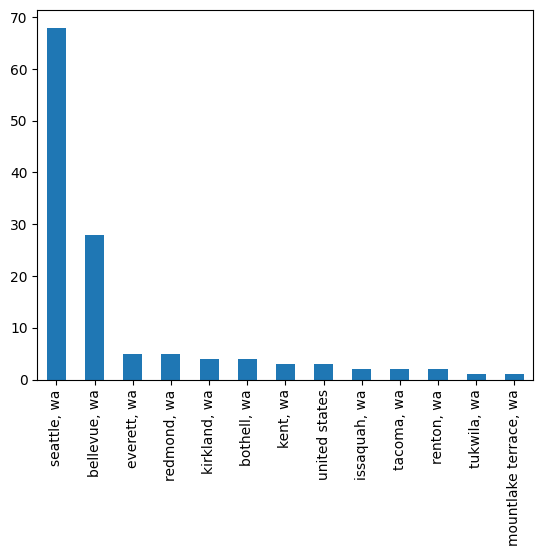

In [194]:
df1['Location'].value_counts().plot.bar()

Conclusion: Two cities (Seattle and Bellevue) are by far more common than the others

Classify the salary estimates based on if they are employer estimates or glassdoor estimates or neither

In [195]:
patternEmployerEst = re.compile("Employer est.:")
patternGlassdoorEst = re.compile("(Glassdoor est.)")

tempSalaryList = []
salaryTypeList = []

for salary in df1['Salary']:
    if patternEmployerEst.search(salary):
        match = patternEmployerEst.search(salary)
        tempSalaryList.append(salary[match.span()[1]:])
        salaryTypeList.append('Employer Est.')
        
    elif patternGlassdoorEst.search(salary):
        match = patternGlassdoorEst.search(salary)
        tempSalaryList.append(salary[:match.span()[0]-2])
        salaryTypeList.append('Glassdoor Est.')
    else:
        tempSalaryList.append('NO SALARY INFO')
        salaryTypeList.append('NO INFO')
        

In [196]:
pd.options.mode.chained_assignment = None # This gets rid of the chained assignment warning when adding columns to dataframes
df1['Salary Estimate Type'] = salaryTypeList       

Convert all salary info into a common format and calculate the average of the salary estimate range for each job that gives a range

In [197]:
rangeSalaryList = []
avgSalaryList = []

for salary in tempSalaryList:
    if salary == 'NO SALARY INFO':
        rangeSalaryList.append(None)
        avgSalaryList.append(None)
        continue  
    salary = salary.replace('$', '')
    if 'K' in salary:
        if ' - ' in salary: 
            lowerEst = int(salary.split('K')[0]) * 1000
            upperEst = int(salary.split('K')[-2].split('-')[-1]) * 1000
            
            rangeSalaryList.append((lowerEst, upperEst))
            avgSalaryList.append(np.mean([lowerEst, upperEst]))
        else:
            #print('- not in salary:', salary)
            est = int(salary.split('K')[0]) * 1000
            #print('salary after:', est)
            
            rangeSalaryList.append((lowerEst, upperEst))
            avgSalaryList.append(np.mean([lowerEst, upperEst]))
            
    elif 'Per Hour' in salary:
        if ' - ' in salary:
            salary = salary.replace(' Per Hour', '')
            lowerEst = int(round(float(salary.split(' - ')[0]) * 40 * 52, 0))
            upperEst = int(round(float(salary.split(' - ')[1]) * 40 * 52, 0))
            
            rangeSalaryList.append((lowerEst, upperEst))
            avgSalaryList.append(np.mean([lowerEst, upperEst]))
        else:
            est = int(round(float(salary.split(' Per Hour')[0]) * 40 * 52, 0))        
        
            rangeSalaryList.append(est)
            avgSalaryList.append(est)
           
    else:
        print('Exception', salary) # No exceptions 

df1['rangeSalary'] = rangeSalaryList      
df1['avgSalary'] = avgSalaryList

Plot the distribution of salaries across the different jobs 

Text(0, 0.5, 'Number of Jobs')

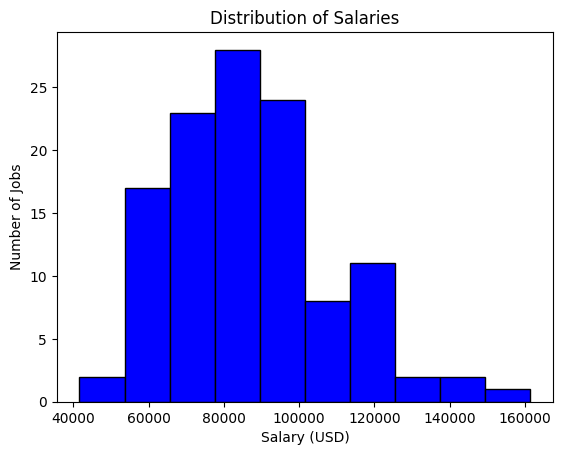

In [273]:
plt.hist(df1['avgSalary'].dropna(), color = 'blue', edgecolor = 'black') # .dropna() is used to ignore jobs with no salary information 
plt.title("Distribution of Salaries") 
plt.xlabel('Salary (USD)')
plt.ylabel('Number of Jobs')

Plot the distribution of just those jobs where the salary estimate is from the Employer

Text(0, 0.5, 'Number of Jobs')

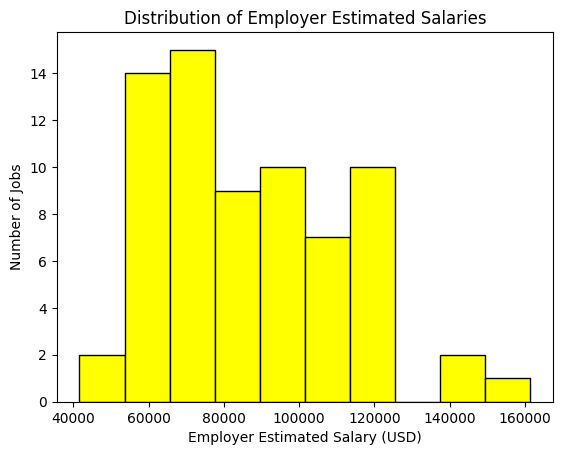

In [271]:
employerEstimates = df1['avgSalary'][df1['Salary Estimate Type'] == 'Employer Est.']
plt.hist(employerEstimates, color = 'yellow', edgecolor = 'black')
plt.title("Distribution of Employer Estimated Salaries") 
plt.xlabel('Employer Estimated Salary (USD)')
plt.ylabel('Number of Jobs')

Plot the distribution of the remaining jobs that are estimated from Glassdoor to look for any discrepancy 

Text(0, 0.5, 'Number of Jobs')

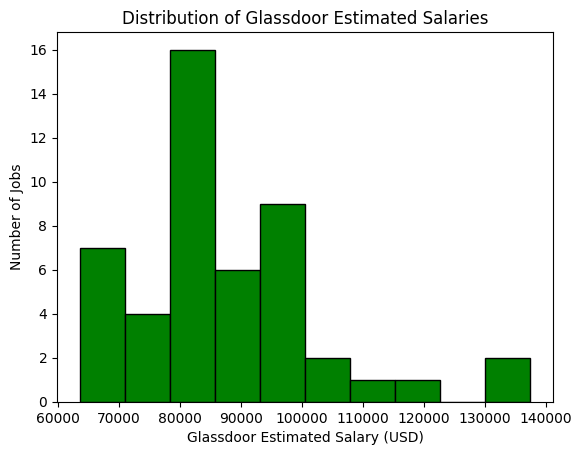

In [272]:
glassdoorEstimates = df1['avgSalary'][df1['Salary Estimate Type'] == 'Glassdoor Est.']
plt.hist(glassdoorEstimates, color = 'green', edgecolor = 'black')
plt.title("Distribution of Glassdoor Estimated Salaries") 
plt.xlabel('Glassdoor Estimated Salary (USD)')
plt.ylabel('Number of Jobs')

In [201]:
np.mean(employerEstimates)

86113.93571428572

In [202]:
np.mean(glassdoorEstimates)

87000.0

Conclusion: Average salary for Glassdoor and employer estimates are very similar ($87k vs. $86.1k respectively) and the distributions look somewhat similar

Do the salaries vary by location? Create a barplot showing the average salary by location with error bars showing standard deviation

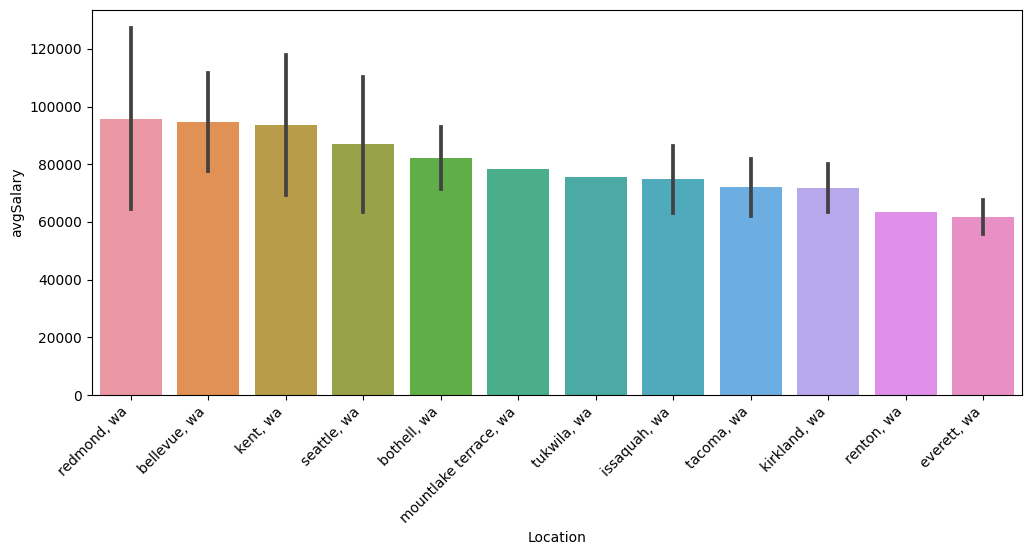

In [254]:

plt.figure(figsize = (12,5))

avgSalaryPlt = sns.barplot(
    data = df1.dropna(), 
    x = 'Location', 
    y = 'avgSalary', 
    errorbar = 'sd', 
    order = df1.dropna().groupby(['Location']).mean().sort_values(by = ['avgSalary'], ascending = False).index # sort by the averages for each location then use the index to order the bars on the bar plot 
    )    

avgSalaryPlt.set_xticklabels(avgSalaryPlt.get_xticklabels(), rotation = 45, ha = 'right')

plt.show()

Note: The cities without errors only have a single job posting in that location, so no standard deviation can be calculated.
Conclusion: Average salaries do vary quite a bit by location, but the error bars also overlap significantly in most cases, indicating that this may not be a statistically significant result. More data would be useful to discern how salaries vary by location, especially for those cities with only a single job posting. 